## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids
import os
from tomo2mesh.projects.steel_am.rw_utils import *
import seaborn as sns

In [2]:
sns.set(font_scale=1.2)
sns.set_style(style='white')

In [3]:
Vx = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_rec', tiff = True).read_full()


##################################################
Found existing tiff folder: 2k_rec
Dataset shape: (2048, 2048, 2048)


In [4]:
voids_1 = Voids().import_from_disk(os.path.join(voids_dir,f"voids_b_1"))

In [5]:
voids_2 = Voids().import_from_disk(os.path.join(voids_dir,f"c2f_2k_b_2_subset"))

In [6]:
voids_4 = Voids().import_from_disk(os.path.join(voids_dir,f"c2f_2k_b_4_subset"))

In [7]:
s1 = np.cbrt(voids_1["sizes"])*2.34
s2 = np.cbrt(voids_2["sizes"])*2.34
s4 = np.cbrt(voids_4["sizes"])*2.34

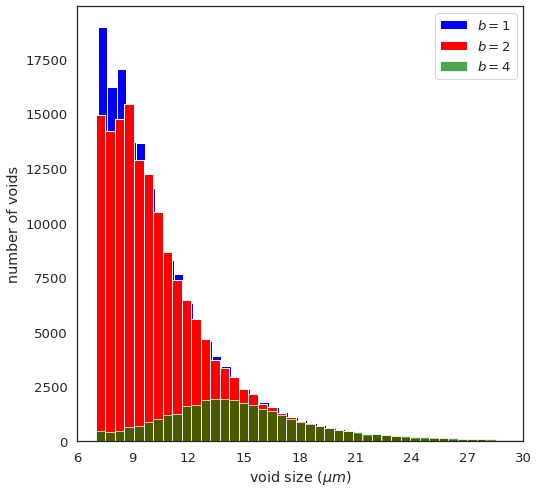

In [9]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
_ = ax.hist(s1[s1>3*2.34], bins = 500, density = False, color = 'blue', label = '$b=1$', alpha = 1)
_ = ax.hist(s2[s2>3*2.34], bins = 500, density = False, color = 'red', label = '$b=2$', alpha = 1)
_ = ax.hist(s4[s4>3*2.34], bins = 500, density = False, color = 'green', label = '$b=4$', alpha = 0.7)


ax.set_xlim([3*2.34,30])
ax.legend()
ax.set_xlabel("void size (${\mu{m}}$)")
ax.set_ylabel("number of voids")
ax.set_xticks(np.linspace(6,30,9,endpoint=True))

In [14]:
print(f"number of noisy pixels wrongly detected as voids in b = 2, : {s2.size - np.sum(s2 >3*2.34)}, total detected : {s2.size}")
print(f"number of noisy pixels wrongly detected as voids in b = 4, : {s4.size - np.sum(s4 >3*2.34)}, total detected : {s4.size}")

number of noisy pixels wrongly detected as voids in b = 2, : 99412, total detected : 255632
number of noisy pixels wrongly detected as voids in b = 4, : 4446, total detected : 39211


In [15]:
print(f"number of actual voids detected in b = 1: {np.sum(s1 >3*2.34)}")
print(f"number of actual voids detected in b = 2: {np.sum(s2 >3*2.34)}")
print(f"number of actual voids detected in b = 4: {np.sum(s4 >3*2.34)}")

number of actual voids detected in b = 1: 162634
number of actual voids detected in b = 2: 156220
number of actual voids detected in b = 4: 34765


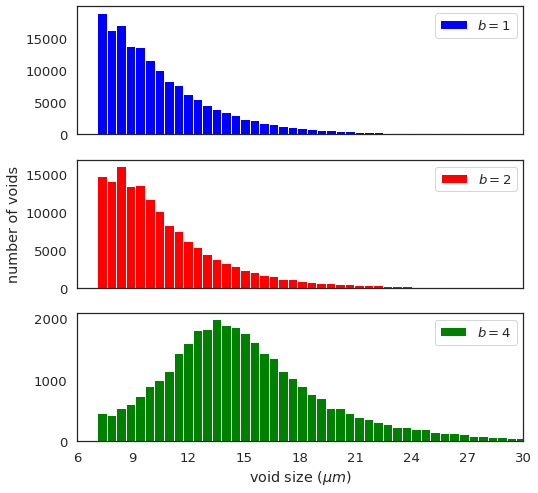

In [28]:
# fig, ax = plt.subplots(3,1,figsize = (8,8), sharex = True, sharey = False)
# _ = ax[0].hist(s1[s1>2.34*3], bins = 500, density = False, color = 'blue', label = '$b=1$')
# _ = ax[1].hist(s2[s2>2.34*3], bins = 500, density = False, color = 'red', label = '$b=2$')
# _ = ax[2].hist(s4[s4>2.34*3], bins = 500, density = False, color = 'green', label = '$b=4$')


# ax[0].set_xlim([3*2.34,30])
# # ax.legend()
# ax[2].set_xlabel("void size (${\mu{m}}$)")
# ax[1].set_ylabel("number of voids")
# ax[0].set_xticks(np.linspace(6,30,9,endpoint=True))
# [ax[i3].legend() for i3 in range(3)]